In [ ]:
import numpy as np
import pandas as pd
import random

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ML/mnist_test.csv')

In [ ]:
df

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.shape

(10000, 785)

In [ ]:
data=df.drop('label',axis=1)

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
#converting dataframe to array
data_array=data.values

In [ ]:
digit = data_array[3600]
digit_image = digit.reshape(28,28)

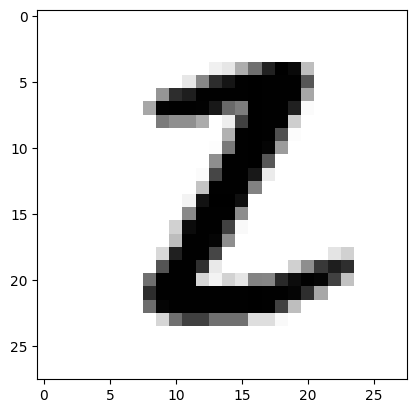

In [ ]:
plt.imshow(digit_image, cmap = matplotlib.cm.binary, interpolation = "nearest")

GMM Using Library

In [ ]:
from sklearn.mixture import GaussianMixture


# perform SVD

In [ ]:
# Step1 : Standardise the data

In [ ]:
from sklearn.preprocessing import StandardScaler
Standard = StandardScaler()
Standardise_data = Standard.fit_transform(data)
Standardised_dataframe = pd.DataFrame(Standardise_data, columns=data.columns)

In [ ]:
means = Standardised_dataframe.mean()

In [ ]:
means

1x1      0.0
1x2      0.0
1x3      0.0
1x4      0.0
1x5      0.0
        ... 
28x24    0.0
28x25    0.0
28x26    0.0
28x27    0.0
28x28    0.0
Length: 784, dtype: float64

In [ ]:
#Step2 : Perform SVD

In [ ]:
data1=Standardised_dataframe-means #To make data mean centered

In [ ]:
data1

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.031601,-0.028523,-0.021737,-0.010001,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.031601,-0.028523,-0.021737,-0.010001,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.031601,-0.028523,-0.021737,-0.010001,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.031601,-0.028523,-0.021737,-0.010001,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.031601,-0.028523,-0.021737,-0.010001,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.031601,-0.028523,-0.021737,-0.010001,0.0,0.0,0.0,0.0,0.0,0.0
9996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.031601,-0.028523,-0.021737,-0.010001,0.0,0.0,0.0,0.0,0.0,0.0
9997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.031601,-0.028523,-0.021737,-0.010001,0.0,0.0,0.0,0.0,0.0,0.0
9998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.031601,-0.028523,-0.021737,-0.010001,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from scipy.linalg import svd

In [ ]:
U, S, Vt = svd(data1)

In [ ]:
U.shape

(10000, 10000)

In [ ]:
# Step3 : To find Principal Components.
# XV= U Sigma

In [ ]:
V=np.transpose(Vt)

In [ ]:
# Principle components are XV = U Sigma

In [ ]:
# for 32 components:
selected_V_feature1 = V[:, :32]
SVD_features_1 = np.dot(data1,selected_V_feature1)
SVD_features_1.shape

(10000, 32)

In [ ]:
# for 64 components:
selected_V_feature2 = V[:, :64]
SVD_features_2 = np.dot(data1,selected_V_feature2)
SVD_features_2.shape

(10000, 64)

In [ ]:
# for 128 components:
selected_V_feature3 = V[:, :128]
SVD_features_3 = np.dot(data1,selected_V_feature3)
SVD_features_3.shape

(10000, 128)

for 10 clusters 128 pca

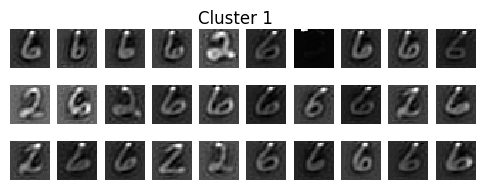

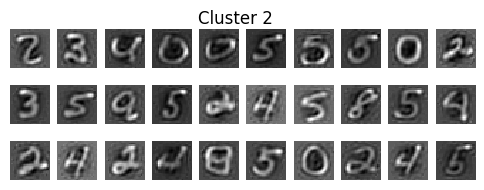

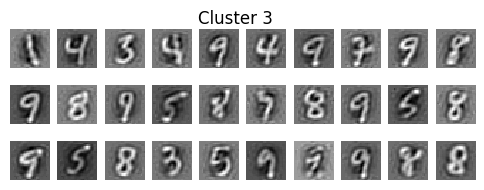

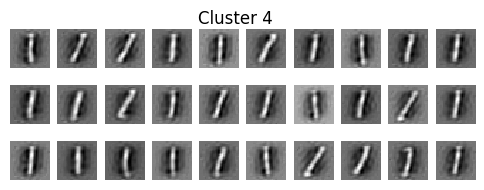

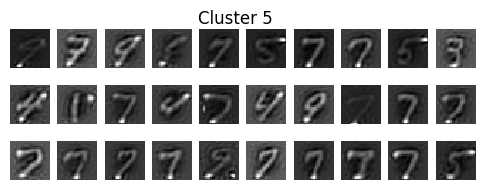

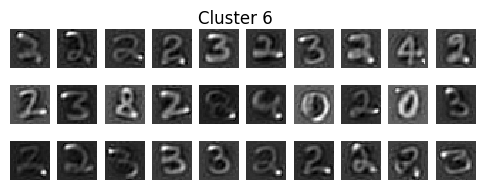

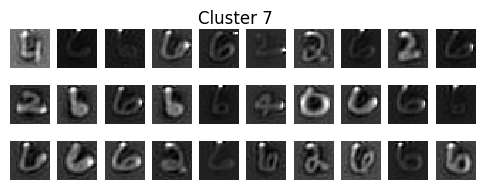

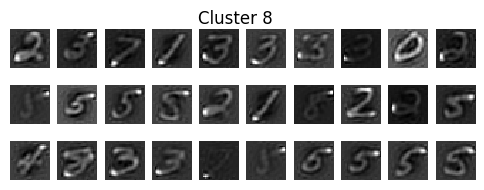

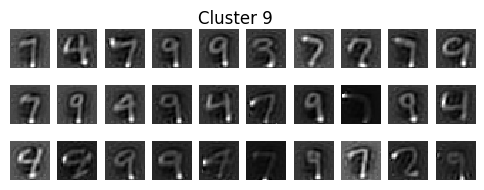

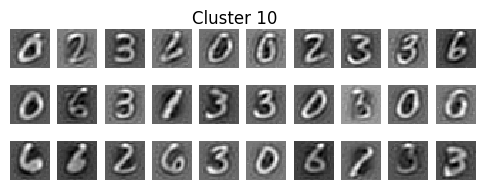

In [ ]:
#applying GMM
gmm_10_128 = GaussianMixture(n_components=10, random_state=0)
labels_10_128 = gmm_10_128.fit_predict(SVD_features_3)

#inverse PCA
data_10_128 = np.dot(SVD_features_3, selected_V_feature3.T)

for j in range(30):
  cluster_indices = np.where(labels_10_128 == j)[0]

  if len(cluster_indices) == 0:
        continue
  selected_indices = np.random.choice(cluster_indices, 30 , replace=False)


  fig, axes = plt.subplots(3, 10, figsize=(6, 2))
  for i, idx in enumerate(selected_indices):

    selected_idx = np.random.choice(cluster_indices, 1)[0]
    digit_data = data_10_128[selected_idx]
    image_data = digit_data.reshape(28, 28)


    ax = axes[i // 10, i % 10]
    ax.clear()
    ax.imshow(image_data, cmap='gray', interpolation='nearest')
    ax.axis('off')

  plt.suptitle(f"Cluster {j+1}", fontsize=12)
  plt.subplots_adjust(top=0.90)
  plt.show()

for 10 clusters 64 PCA

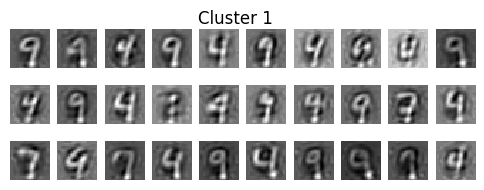

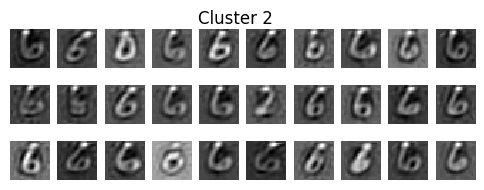

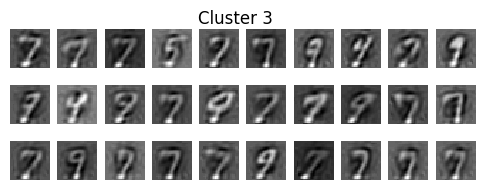

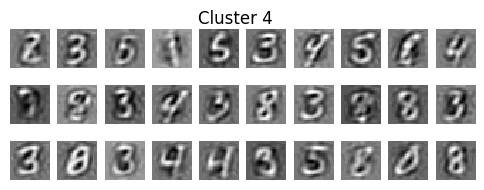

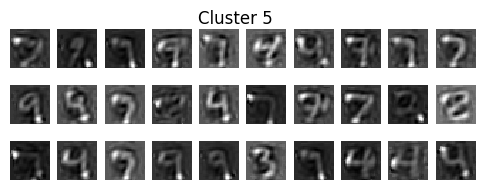

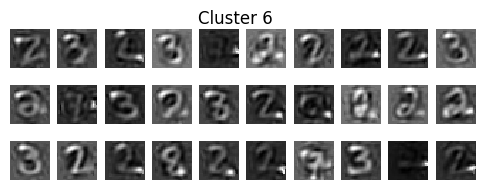

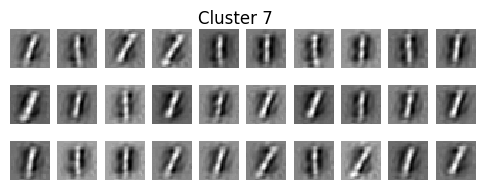

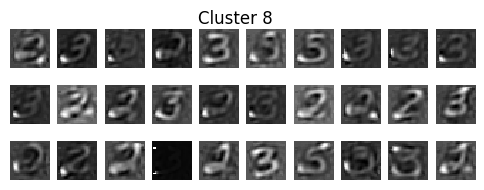

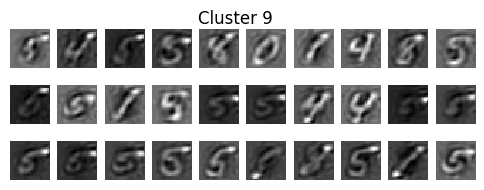

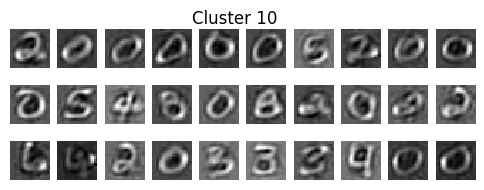

In [ ]:
#applying GMM
gmm_10_64 = GaussianMixture(n_components=10, random_state=0)
labels_10_64 = gmm_10_64.fit_predict(SVD_features_2)

#inverse PCA
data_10_64 = np.dot(SVD_features_2, selected_V_feature2.T)

for j in range(30):
  cluster_indices = np.where(labels_10_64 == j)[0]

  if len(cluster_indices) == 0:
        continue
  selected_indices = np.random.choice(cluster_indices, 30 , replace=False)


  fig, axes = plt.subplots(3, 10, figsize=(6, 2))
  for i, idx in enumerate(selected_indices):

    selected_idx = np.random.choice(cluster_indices, 1)[0]
    digit_data = data_10_64[selected_idx]
    image_data = digit_data.reshape(28, 28)


    ax = axes[i // 10, i % 10]
    ax.clear()
    ax.imshow(image_data, cmap='gray', interpolation='nearest')
    ax.axis('off')

  plt.suptitle(f"Cluster {j+1}", fontsize=12)
  plt.subplots_adjust(top=0.90)
  plt.show()

for 10 clusters 32 PCA

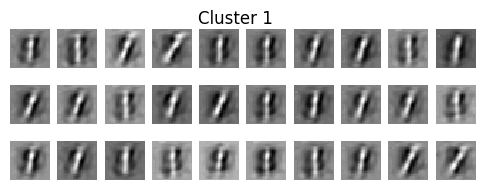

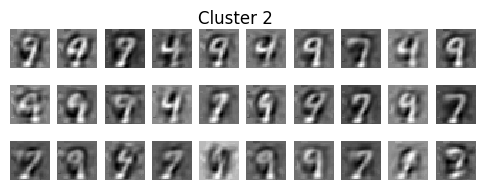

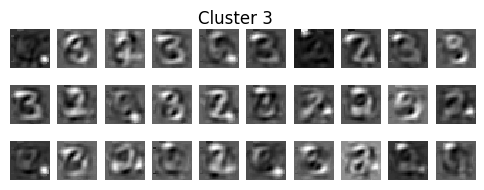

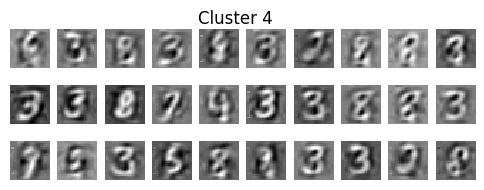

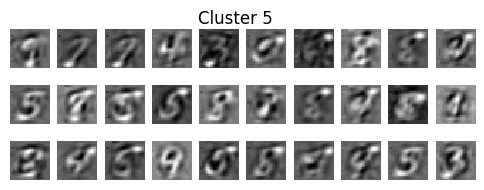

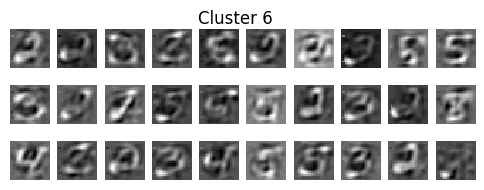

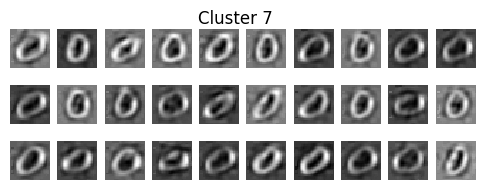

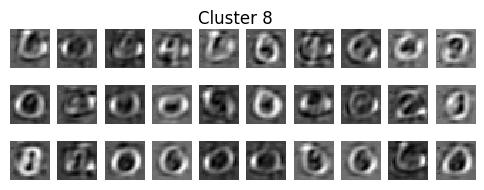

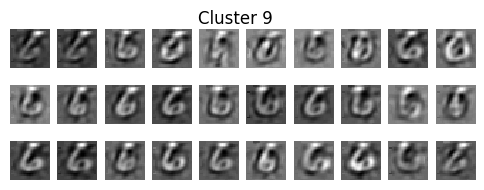

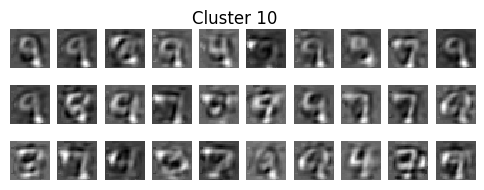

In [ ]:
#applying GMM
gmm_10_32 = GaussianMixture(n_components=10, random_state=0)
labels_10_32 = gmm_10_32.fit_predict(SVD_features_1)

#inverse PCA
data_10_32 = np.dot(SVD_features_1, selected_V_feature1.T)

for j in range(30):
  cluster_indices = np.where(labels_10_32 == j)[0]

  if len(cluster_indices) == 0:
        continue
  selected_indices = np.random.choice(cluster_indices, 30 , replace=False)


  fig, axes = plt.subplots(3, 10, figsize=(6, 2))
  for i, idx in enumerate(selected_indices):

    selected_idx = np.random.choice(cluster_indices, 1)[0]
    digit_data = data_10_32[selected_idx]
    image_data = digit_data.reshape(28, 28)


    ax = axes[i // 10, i % 10]
    ax.clear()
    ax.imshow(image_data, cmap='gray', interpolation='nearest')
    ax.axis('off')

  plt.suptitle(f"Cluster {j+1}", fontsize=12)
  plt.subplots_adjust(top=0.90)
  plt.show()

for 7 clusters and 128 PCA

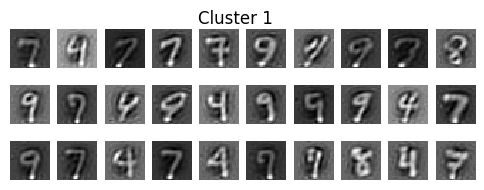

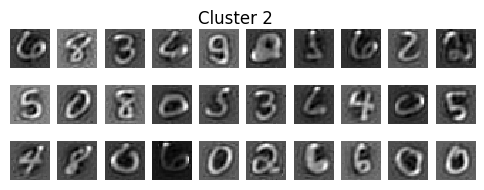

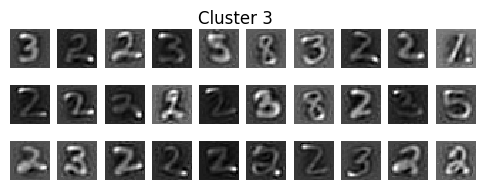

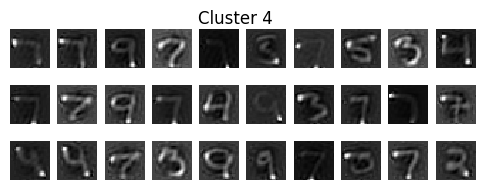

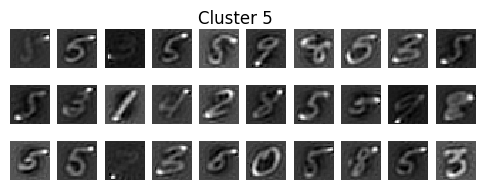

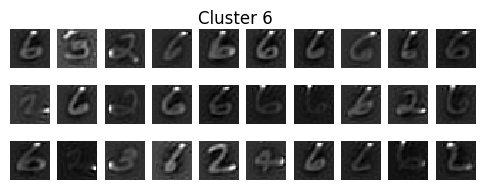

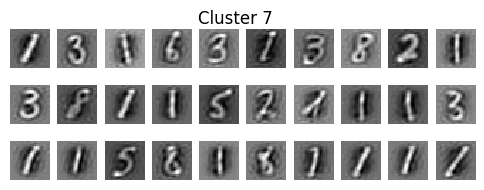

In [ ]:
#applying GMM
gmm_7_128 = GaussianMixture(n_components=7, random_state=0)
labels_7_128 = gmm_7_128.fit_predict(SVD_features_3)

#inverse PCA
data_7_128 = np.dot(SVD_features_3, selected_V_feature3.T)

for j in range(30):
  cluster_indices = np.where(labels_7_128 == j)[0]

  if len(cluster_indices) == 0:
        continue
  selected_indices = np.random.choice(cluster_indices, 30 , replace=False)


  fig, axes = plt.subplots(3, 10, figsize=(6, 2))
  for i, idx in enumerate(selected_indices):

    selected_idx = np.random.choice(cluster_indices, 1)[0]
    digit_data = data_7_128[selected_idx]
    image_data = digit_data.reshape(28, 28)


    ax = axes[i // 10, i % 10]
    ax.clear()
    ax.imshow(image_data, cmap='gray', interpolation='nearest')
    ax.axis('off')

  plt.suptitle(f"Cluster {j+1}", fontsize=12)
  plt.subplots_adjust(top=0.90)
  plt.show()

for 7 clstuers 64 PCA

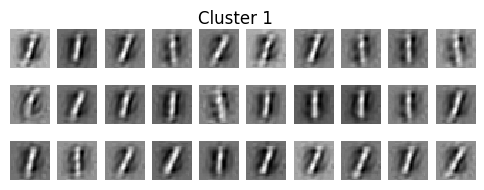

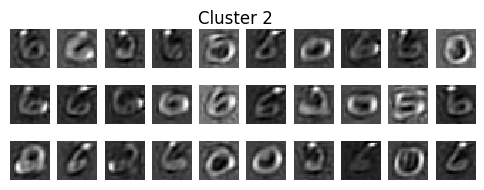

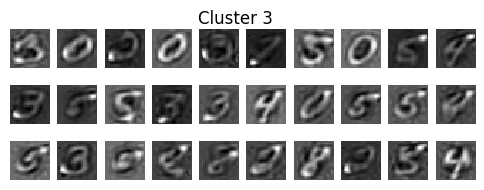

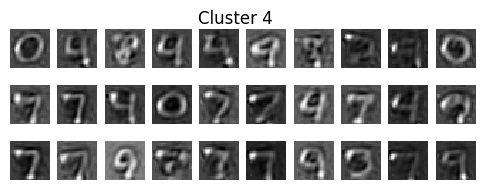

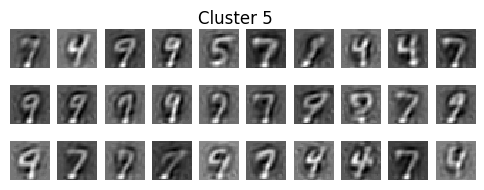

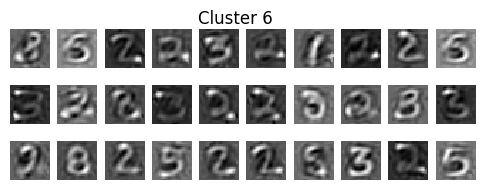

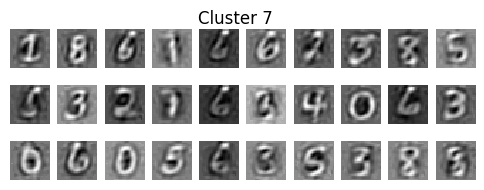

In [ ]:
#applying GMM
gmm_7_64 = GaussianMixture(n_components=7, random_state=0)
labels_7_64 = gmm_7_128.fit_predict(SVD_features_2)

#inverse PCA
data_7_64 = np.dot(SVD_features_2, selected_V_feature2.T)

for j in range(30):
  cluster_indices = np.where(labels_7_64 == j)[0]

  if len(cluster_indices) == 0:
        continue
  selected_indices = np.random.choice(cluster_indices, 30 , replace=False)


  fig, axes = plt.subplots(3, 10, figsize=(6, 2))
  for i, idx in enumerate(selected_indices):

    selected_idx = np.random.choice(cluster_indices, 1)[0]
    digit_data = data_7_64[selected_idx]
    image_data = digit_data.reshape(28, 28)


    ax = axes[i // 10, i % 10]
    ax.clear()
    ax.imshow(image_data, cmap='gray', interpolation='nearest')
    ax.axis('off')

  plt.suptitle(f"Cluster {j+1}", fontsize=12)
  plt.subplots_adjust(top=0.90)
  plt.show()

7 clusters for 32 PCA

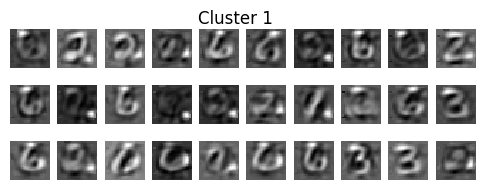

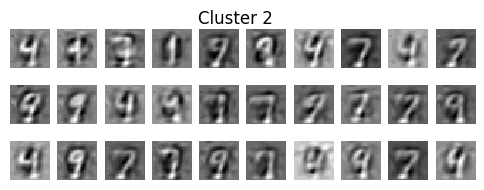

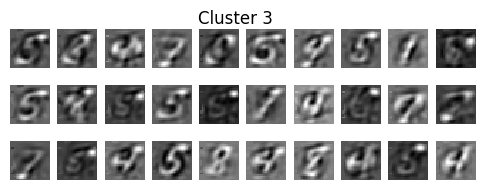

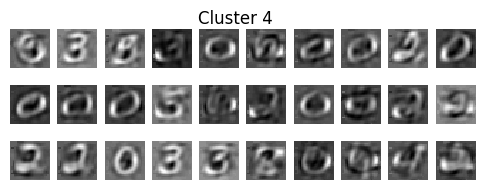

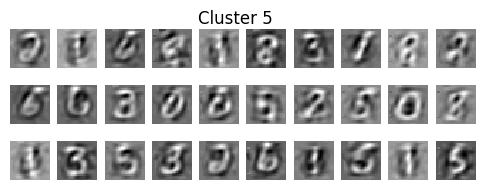

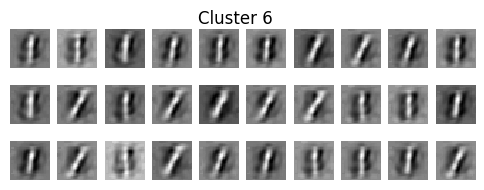

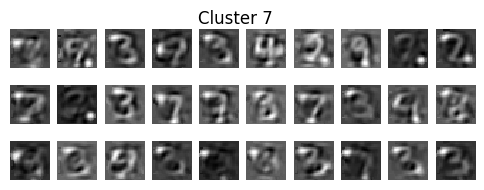

In [ ]:
#applying GMM
gmm_7_32 = GaussianMixture(n_components=7, random_state=0)
labels_7_32 = gmm_7_32.fit_predict(SVD_features_1)

#inverse PCA
data_7_32 = np.dot(SVD_features_1, selected_V_feature1.T)

for j in range(30):
  cluster_indices = np.where(labels_7_32 == j)[0]

  if len(cluster_indices) == 0:
        continue
  selected_indices = np.random.choice(cluster_indices, 30 , replace=False)


  fig, axes = plt.subplots(3, 10, figsize=(6, 2))
  for i, idx in enumerate(selected_indices):

    selected_idx = np.random.choice(cluster_indices, 1)[0]
    digit_data = data_7_32[selected_idx]
    image_data = digit_data.reshape(28, 28)


    ax = axes[i // 10, i % 10]
    ax.clear()
    ax.imshow(image_data, cmap='gray', interpolation='nearest')
    ax.axis('off')

  plt.suptitle(f"Cluster {j+1}", fontsize=12)
  plt.subplots_adjust(top=0.90)
  plt.show()

4 clusters for 128 PCA

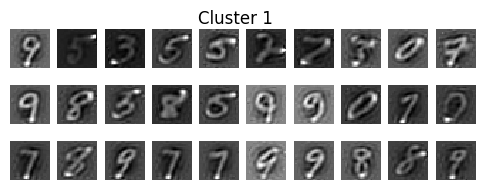

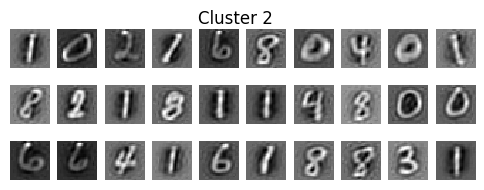

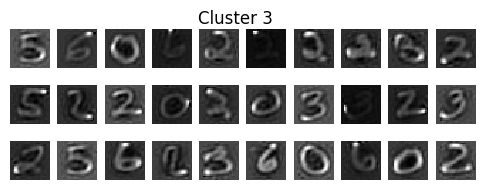

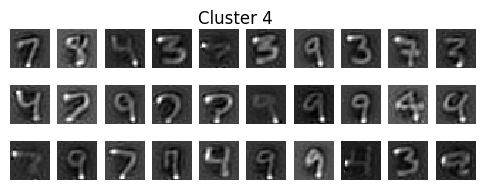

In [ ]:
#applying GMM
gmm_4_128 = GaussianMixture(n_components=4, random_state=0)
labels_4_128 = gmm_4_128.fit_predict(SVD_features_3)

#inverse PCA
data_4_128 = np.dot(SVD_features_3, selected_V_feature3.T)

for j in range(30):
  cluster_indices = np.where(labels_4_128 == j)[0]

  if len(cluster_indices) == 0:
        continue
  selected_indices = np.random.choice(cluster_indices, 30 , replace=False)


  fig, axes = plt.subplots(3, 10, figsize=(6, 2))
  for i, idx in enumerate(selected_indices):

    selected_idx = np.random.choice(cluster_indices, 1)[0]
    digit_data = data_4_128[selected_idx]
    image_data = digit_data.reshape(28, 28)


    ax = axes[i // 10, i % 10]
    ax.clear()
    ax.imshow(image_data, cmap='gray', interpolation='nearest')
    ax.axis('off')

  plt.suptitle(f"Cluster {j+1}", fontsize=12)
  plt.subplots_adjust(top=0.90)
  plt.show()

4 clusters for 64 PCA

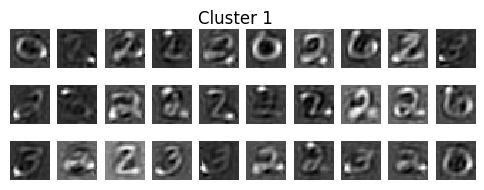

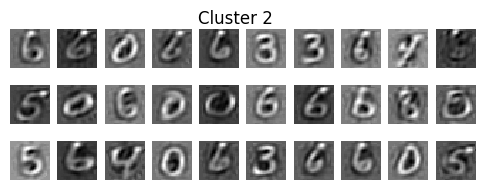

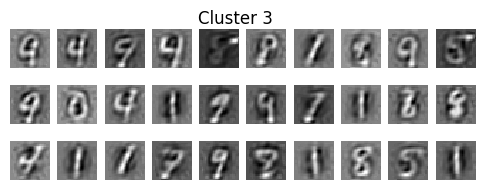

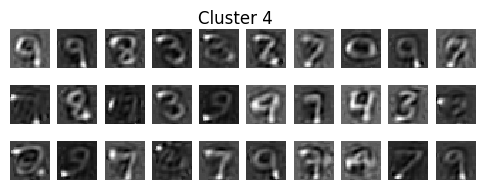

In [ ]:
#applying GMM
gmm_4_64 = GaussianMixture(n_components=4, random_state=0)
labels_4_64 = gmm_4_128.fit_predict(SVD_features_2)

#inverse PCA
data_4_64 = np.dot(SVD_features_2, selected_V_feature2.T)

for j in range(30):
  cluster_indices = np.where(labels_4_64 == j)[0]

  if len(cluster_indices) == 0:
        continue
  selected_indices = np.random.choice(cluster_indices, 30 , replace=False)


  fig, axes = plt.subplots(3, 10, figsize=(6, 2))
  for i, idx in enumerate(selected_indices):

    selected_idx = np.random.choice(cluster_indices, 1)[0]
    digit_data = data_4_64[selected_idx]
    image_data = digit_data.reshape(28, 28)


    ax = axes[i // 10, i % 10]
    ax.clear()
    ax.imshow(image_data, cmap='gray', interpolation='nearest')
    ax.axis('off')

  plt.suptitle(f"Cluster {j+1}", fontsize=12)
  plt.subplots_adjust(top=0.90)
  plt.show()

4 clusters for 32 PCA

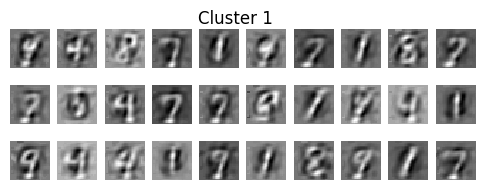

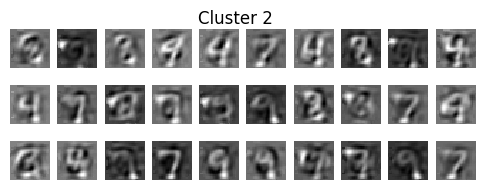

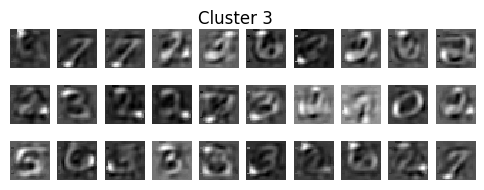

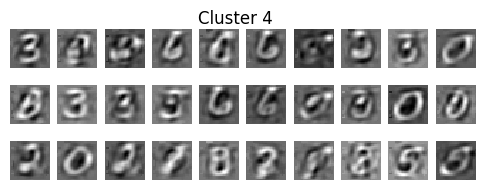

In [ ]:
#applying GMM
gmm_4_32 = GaussianMixture(n_components=4, random_state=0)
labels_4_32 = gmm_4_32.fit_predict(SVD_features_1)

#inverse PCA
data_4_32 = np.dot(SVD_features_1, selected_V_feature1.T)

for j in range(30):
  cluster_indices = np.where(labels_4_32 == j)[0]

  if len(cluster_indices) == 0:
        continue
  selected_indices = np.random.choice(cluster_indices, 30 , replace=False)


  fig, axes = plt.subplots(3, 10, figsize=(6, 2))
  for i, idx in enumerate(selected_indices):

    selected_idx = np.random.choice(cluster_indices, 1)[0]
    digit_data = data_4_32[selected_idx]
    image_data = digit_data.reshape(28, 28)


    ax = axes[i // 10, i % 10]
    ax.clear()
    ax.imshow(image_data, cmap='gray', interpolation='nearest')
    ax.axis('off')

  plt.suptitle(f"Cluster {j+1}", fontsize=12)
  plt.subplots_adjust(top=0.90)
  plt.show()